In [4]:
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [5]:
#load dataset
mnist=tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels)=mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


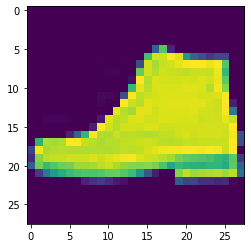

In [6]:
#printing training images and training label
import matplotlib.pyplot as plt
plt.imshow(training_images[42])

In [7]:
#scale
#training_images=training_images/255.0
#test_images=test_images/255.0

In [8]:
#design the model
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10,activation=tf.nn.softmax)])
#sequential: defines a sequence of layers in the neural network
#flatten: takes a square and turns it into a one-dimensional vector
#dense: adds a layer of neurons

In [9]:
#compile and train the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images,training_labels,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 14.7665 - accuracy: 0.7288
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5305 - accuracy: 0.8155
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5015 - accuracy: 0.8252
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4847 - accuracy: 0.8326
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4750 - accuracy: 0.8384


In [10]:
#test the model
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5134 - accuracy: 0.8166


[0.5133682489395142, 0.8166000247001648]

In [11]:
#classifications=model.predict(test_images)
#print(classifications[0])
#print(test_labels[0])

In [16]:
#my callback class
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.mode.stop_training=True


In [17]:
callbacks=myCallback()
#compile and train the model
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images,training_labels,epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4657 - accuracy: 0.8500
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4396 - accuracy: 0.8532
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4814 - accuracy: 0.8423
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4347 - accuracy: 0.8542
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4225 - accuracy: 0.8600
